In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV en un DataFrame
df = pd.read_csv("processed_data/athlete_events_clean.csv")

In [15]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No medal
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178501,135569,Andrzej ya,M,29.0,179.0,89.0,Poland,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No medal
178502,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No medal
178503,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No medal
178504,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No medal


In [16]:
# Primero dividir las variables por tipo:

variables_num = ['Age', 'Height', 'Weight']

variables_cat = ['Team','NOC','Games','City','Sport','Event','Name','Sex','Season','ID','Year']
variables_cat1 = ['Team','NOC','Games','City','Sport','Event','Name','Sex','Season']

target = ['Medal']

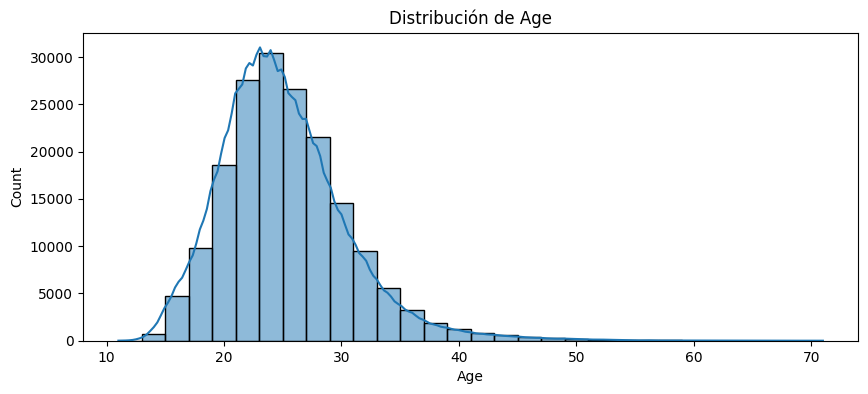

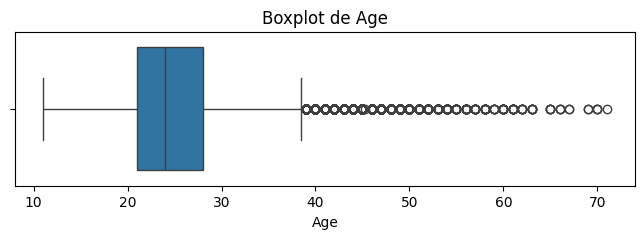

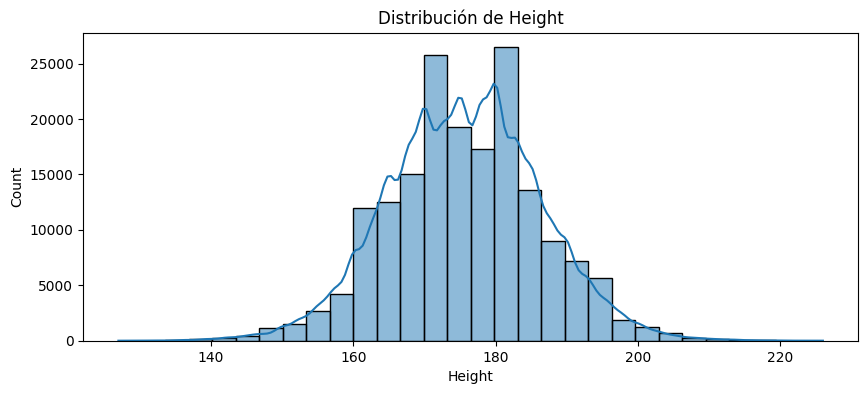

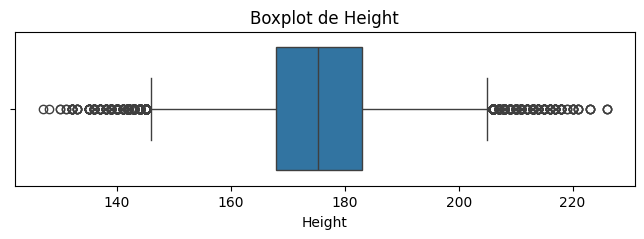

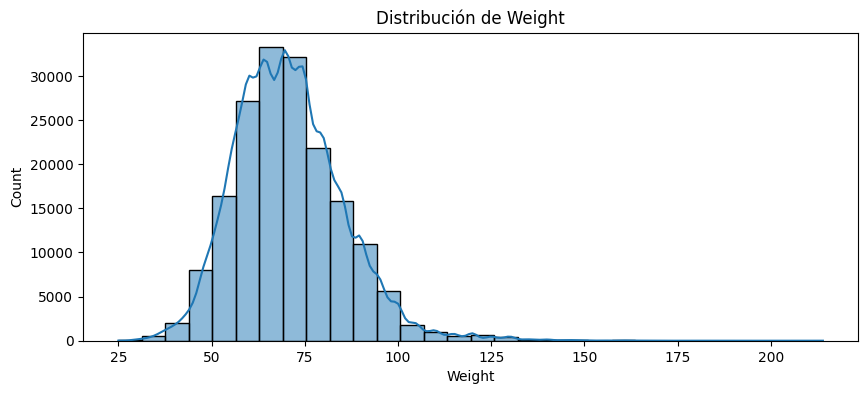

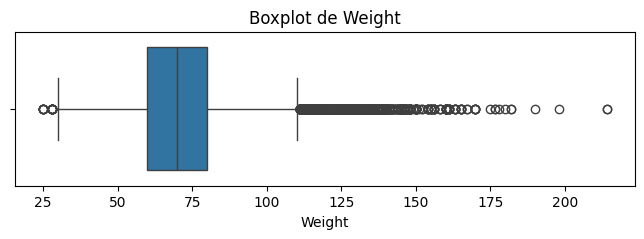

In [17]:
#Histograma y Boxplot de variables numéricas

for col in variables_num:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.show()

    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


#Observamos algunos outliers, por ejemplo mayores de 60 años es practicamente imposible que hoy en dia se compita en JJOO.

In [18]:
peso_alto = df[df['Weight'] > 180].shape[0]
peso_bajo = df[df['Weight'] < 30].shape[0]
edad_mayor = df[df['Age'] > 60].shape[0]
altura_alta = df[df['Height'] > 220].shape[0]
altura_baja = df[df['Height'] < 135].shape[0]

print(f"Número de atletas con peso > 180 kg: {peso_alto}")
print(f"Número de atletas con peso < 30 kg: {peso_bajo}")
print(f"Número de atletas con mas de 60 años: {edad_mayor}")
print(f"Número de atletas con altura > 220cm : {altura_alta}")
print(f"Número de atletas con altura < 120cm : {altura_baja}")

#Vemos que hay muy pocos valores con estas caracteristicas, los trataeremos como outliers y los eliminaremos.

Número de atletas con peso > 180 kg: 6
Número de atletas con peso < 30 kg: 19
Número de atletas con mas de 60 años: 38
Número de atletas con altura > 220cm : 11
Número de atletas con altura < 120cm : 20


In [19]:
df = df[df['Age'] <= 60]
df = df[df['Weight'] < 180]
df = df[df['Weight'] > 30]
df = df[df['Height'] < 220]
df = df[df['Height'] > 135]

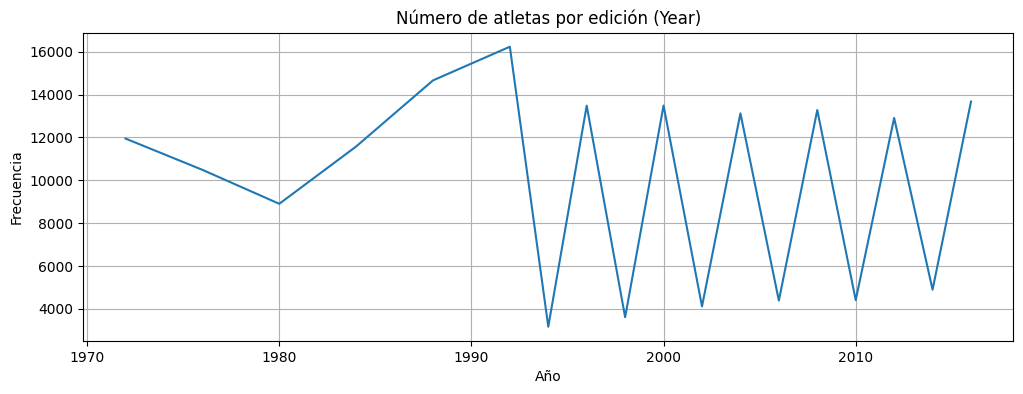

In [20]:
if 'Year' in df.columns:
    plt.figure(figsize=(12,4))
    df['Year'].value_counts().sort_index().plot(kind='line')
    plt.title("Número de atletas por edición (Year)")
    plt.xlabel("Año")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

#Aqui vemos que la cantidad de atletas participantes en los JJOO es estable a lo largo del tiempo.
# Antes de 1990, los juegos olimpicos de invierno y verano se contabilizaban juntos

In [21]:
def barplot_categories(df, col, top=20):
    counts = df[col].value_counts()
    
    print(f"\n\n================= VARIABLE CATEGÓRICA: {col} =================")

    # Si tiene muchas categorías, solo graficamos las top N
    if len(counts) > top:
        counts = counts.head(top)

    plt.figure(figsize=(10,4))
    sns.barplot(x=counts.values, y=counts.index)
    plt.title(f"Top {top} categorías en {col}")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)
    plt.show()



================= VARIABLE CATEGÓRICA: Team =================


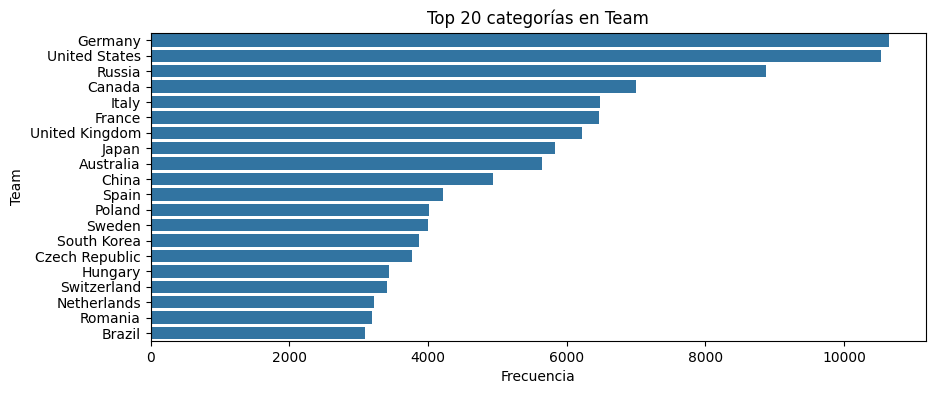



================= VARIABLE CATEGÓRICA: NOC =================


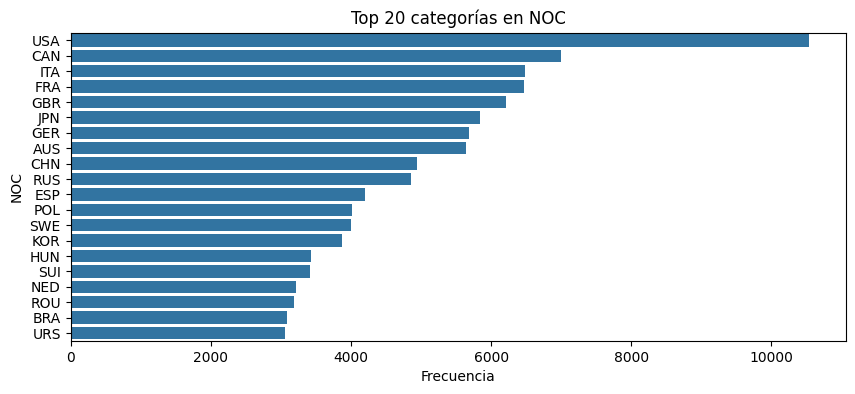



================= VARIABLE CATEGÓRICA: Games =================


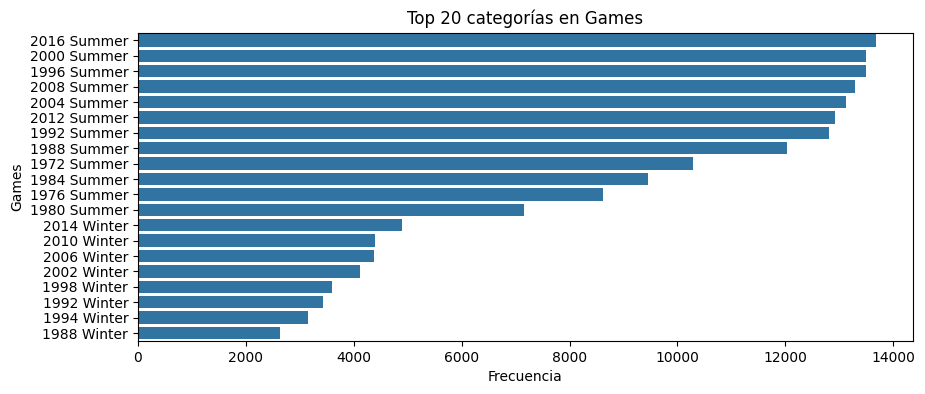



================= VARIABLE CATEGÓRICA: City =================


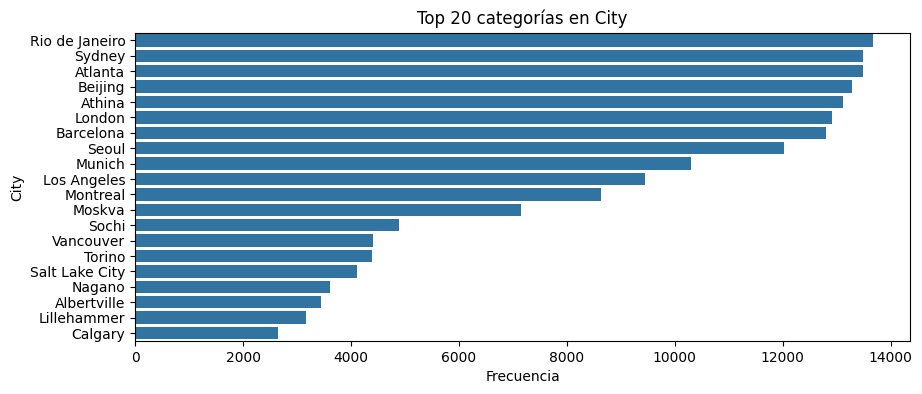



================= VARIABLE CATEGÓRICA: Sport =================


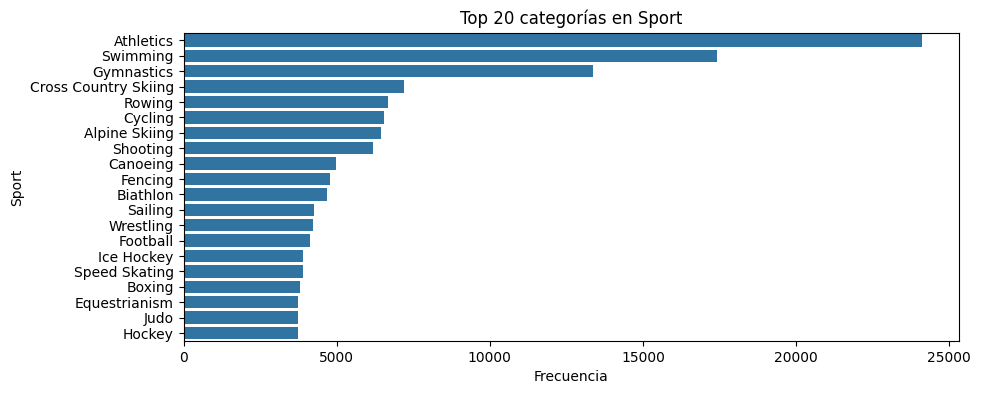



================= VARIABLE CATEGÓRICA: Event =================


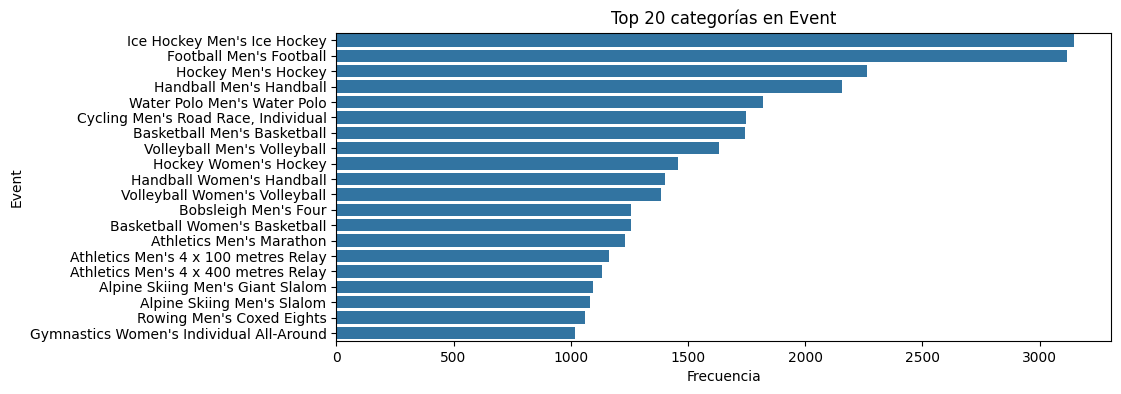



================= VARIABLE CATEGÓRICA: Name =================


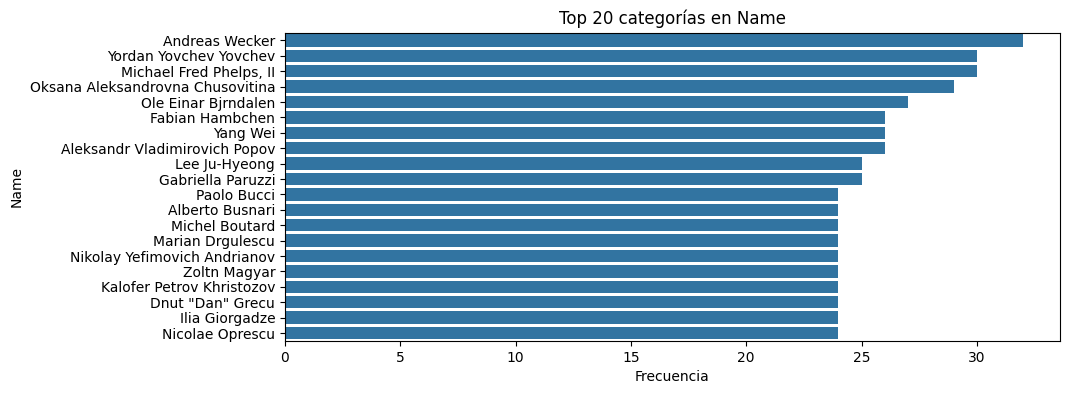



================= VARIABLE CATEGÓRICA: Sex =================


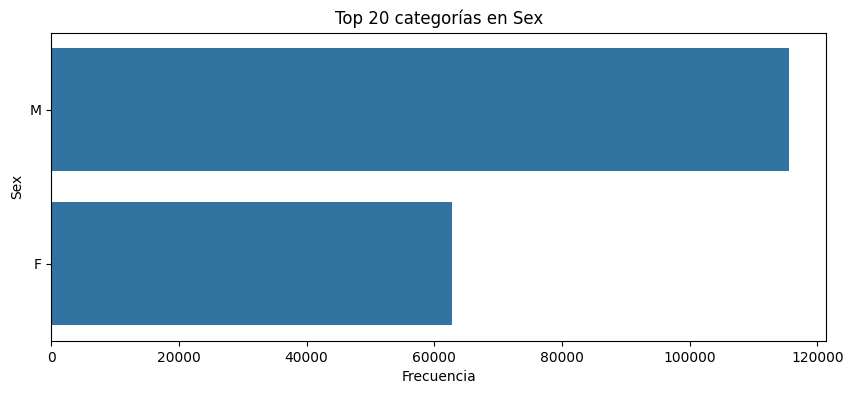



================= VARIABLE CATEGÓRICA: Season =================


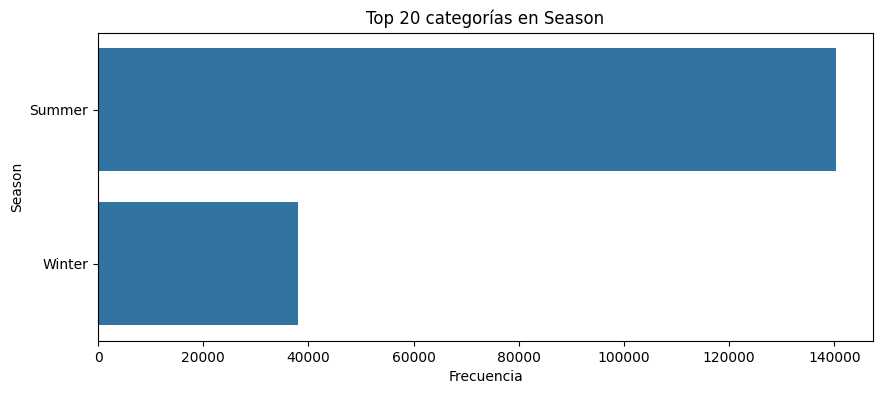

In [22]:
for col in variables_cat1:
    barplot_categories(df, col, top=20)

#Aqui podemos ver datos interesantes, como los países con mas participantes en los JJOO. 
#Vemos que la lista de Team y NOC no es la misma, vamos a suprimir la columna NOC que es redundante con Team pero no esta tratada como si hemos hecho con Team
#Los JJOO de Sydney 2000 es donde mas atletas participaron.
#En cuanto a categorias, Atletismo, natación y Gimnasia son las disciplinas mas representadas en los JJOO.
#Igualmente que con Team y NOC, las columnas de Sport y Event parecen las mismas. Event parece que divide las diferences disciplinas dentro de un deporte, lo que puede entorpecer el analisis. La descartaremos para nuestro modelo.
#Vemos que Andreas Wecker es el deportista que ha participado en mas pruebas en los JJOO.
#A lo largo de la historia, han participado casi el doble de hombres que de mujeres.
#Los JJOO de verano tienen unas cuatro veces mas de deportistas que los de invierno.



================= TARGET: Medal =================
Medal
No medal    154016
Bronze        8332
Gold          8046
Silver        7961
Name: count, dtype: int64


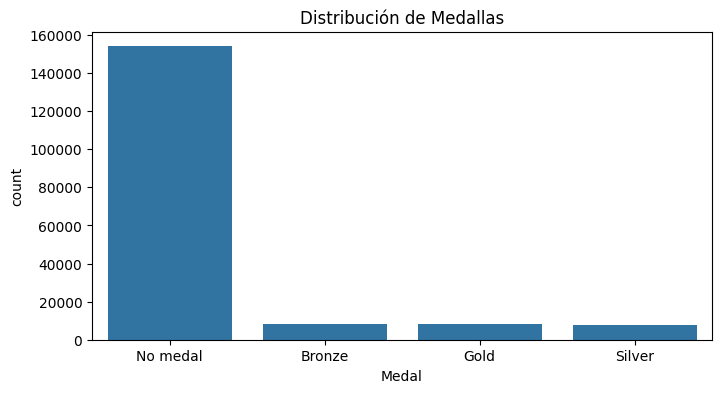


Proporción:
Medal
No medal    0.863536
Bronze      0.046716
Gold        0.045112
Silver      0.044636
Name: proportion, dtype: float64


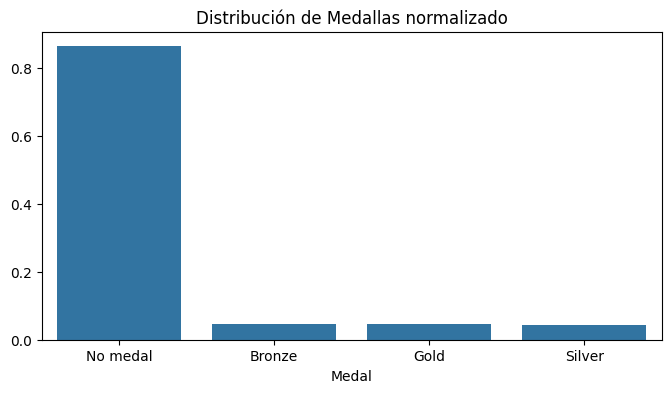

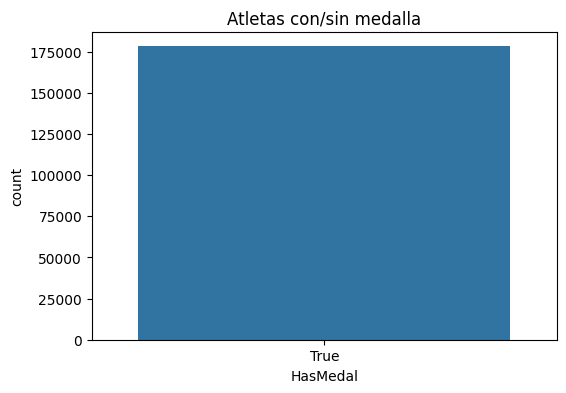

In [25]:
print("\n\n================= TARGET: Medal =================")
print(df['Medal'].value_counts())

# Conteo de medallas
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Medal')
plt.title("Distribución de Medallas")
plt.show()

# Proporciones
print("\nProporción:")
medal_props = df['Medal'].value_counts(normalize=True)
print(df['Medal'].value_counts(normalize=True))
plt.figure(figsize=(8,4))
sns.barplot(x=medal_props.index, y=medal_props.values)
plt.title("Distribución de Medallas normalizado")
plt.show()

# Variable binaria HasMedal
df['HasMedal'] = df['Medal'].notna()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='HasMedal')
plt.title("Atletas con/sin medalla")
plt.show()